In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

In [2]:
sample_df = pd.read_csv('sample_data.csv')
features = list(set(sample_df.columns) - set(("manual_fraud", "bot_fraud")))

X = sample_df[features]
y_manual = sample_df["manual_fraud"]
y_bot = sample_df["bot_fraud"]

X_train,X_test,y_train,y_test=train_test_split(X,y_manual,test_size=0.3,random_state=0)
d_train=lgb.Dataset(X_train.drop(columns=['visitor_profile']), label=y_train)

params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=10
params["is_unbalance"]=True
#train the model 
clf=lgb.train(params,d_train,100) #train the model on 100 epocs
#prediction on the test set
X_test["y_pred"] = clf.predict(X_test.drop(columns=['visitor_profile']))
X_test["y_pred_binary"] = np.where(y_pred > 0.5, 1, 0)
X_test["y_test"] = y_test

# focus just on manual visitors for now
X_test = X_test[X_test["visitor_profile"].isin("suspicious_visitor", "highly_suspicious_visitor", "manual_card_fraud")]


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1757, number of negative: 698243
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029746 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 42
[LightGBM] [Info] Number of data points in the train set: 700000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002510 -> initscore=-5.984959
[LightGBM] [Info] Start training from score -5.984959


/Users/tillman/sentry/notebooks/env/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


NameError: name 'y_pred' is not defined

In [ ]:
tmp_df = 
tn, fp, fn, tp = confusion_matrix(tmp_df["y_test"], tmp_df["y_pred_binary"]).ravel()
sensitivity = tp / (tp+fn)
specificity = tn / (tn + fp)
accuracy_score(tmp_df["y_test"], tmp_df["y_pred_binary"])
print("sensitivity: ", sensitivity)
print("specificity: ", specificity)
print("auc", roc_auc_score(y_test, y_pred))
print(f"accuracy: {acc}")

In [46]:

for profile in list(set(X_test["visitor_profile"])):
    print(f"profile: {profile}, obs: {len(tmp_df)}")
    tmp_df = X_test[X_test["visitor_profile"] == profile]
    accuracy_score(tmp_df["y_test"], tmp_df["y_pred_binary"])
    acc = accuracy_score(tmp_df["y_test"], tmp_df["y_pred_binary"])
    print(f"accuracy: {acc}")
    
    try: 
        tn, fp, fn, tp = confusion_matrix(tmp_df["y_test"], tmp_df["y_pred_binary"]).ravel()

        sensitivity = tp / (tp+fn)
        specificity = tn / (tn + fp)


        print(tn, fp, fn, tp)
        print("sensitivity: ", sensitivity)
        print("specificity: ", specificity)
        print("auc", roc_auc_score(y_test, y_pred))
    except:
        continue


# sensitivity:  0.8213420316868593
# specificity:  0.9031389359421993
# auc 0.9240501321722183

profile: highly_suspicious_visitor, obs: 292
accuracy: 0.975763090412772
11796 293 0 0
sensitivity:  nan
specificity:  0.975763090412772
auc 0.9932499985124668
profile: manual_registration_spam, obs: 12089
accuracy: 1.0
profile: manual_ATO, obs: 292
accuracy: 1.0
profile: bot_smart_card_cracking, obs: 150
accuracy: 0.9803921568627451
150 3 0 0
sensitivity:  nan
specificity:  0.9803921568627451


/Users/tillman/sentry/notebooks/env/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()
/Users/tillman/sentry/notebooks/env/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()


auc 0.9932499985124668
profile: bot_card_cracking, obs: 153
accuracy: 0.9916387959866221
593 5 0 0
sensitivity:  nan
specificity:  0.9916387959866221
auc 0.9932499985124668
profile: bot_smart_registration_spam, obs: 598
accuracy: 0.963855421686747
160 6 0 0
sensitivity:  nan
specificity:  0.963855421686747
auc 0.9932499985124668
profile: bot_registration_spam, obs: 166
accuracy: 1.0
profile: bot_smart_ATO, obs: 591
accuracy: 0.9370629370629371
134 9 0 0
sensitivity:  nan
specificity:  0.9370629370629371


/Users/tillman/sentry/notebooks/env/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()
/Users/tillman/sentry/notebooks/env/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()
/Users/tillman/sentry/notebooks/env/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()


auc 0.9932499985124668
profile: bot_ATO, obs: 143
accuracy: 1.0
profile: normal_visitor, obs: 575
accuracy: 1.0
profile: suspicious_visitor, obs: 270011
accuracy: 0.9995311767463666
14924 7 0 0
sensitivity:  nan
specificity:  0.9995311767463666
auc 0.9932499985124668
profile: manual_card_fraud, obs: 14931
accuracy: 0.9335548172757475
0 0 20 281
sensitivity:  0.9335548172757475
specificity:  nan
auc 0.9932499985124668


/Users/tillman/sentry/notebooks/env/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()
/Users/tillman/sentry/notebooks/env/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

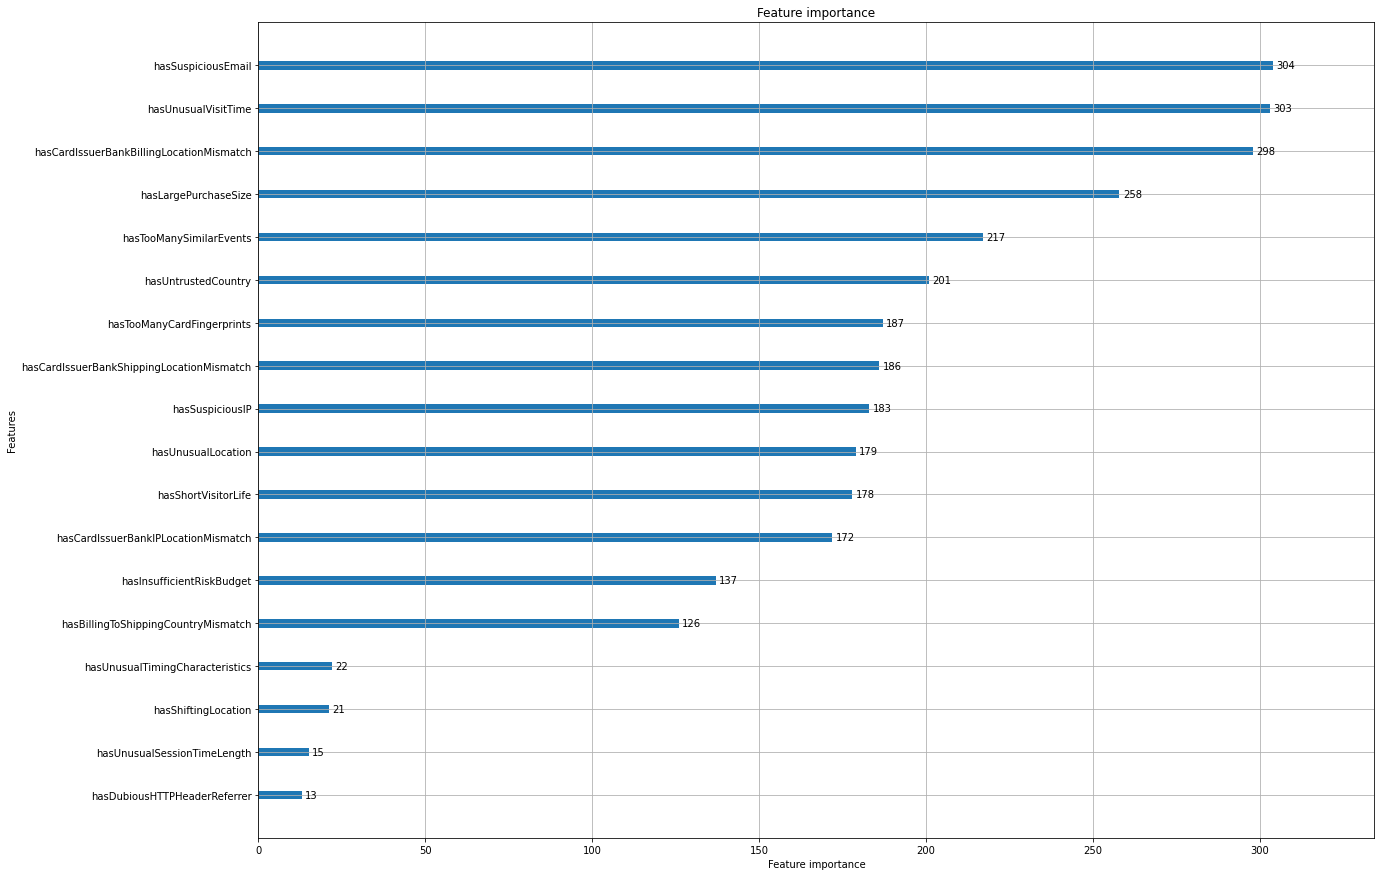

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 15]

lgb.plot_importance(clf)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

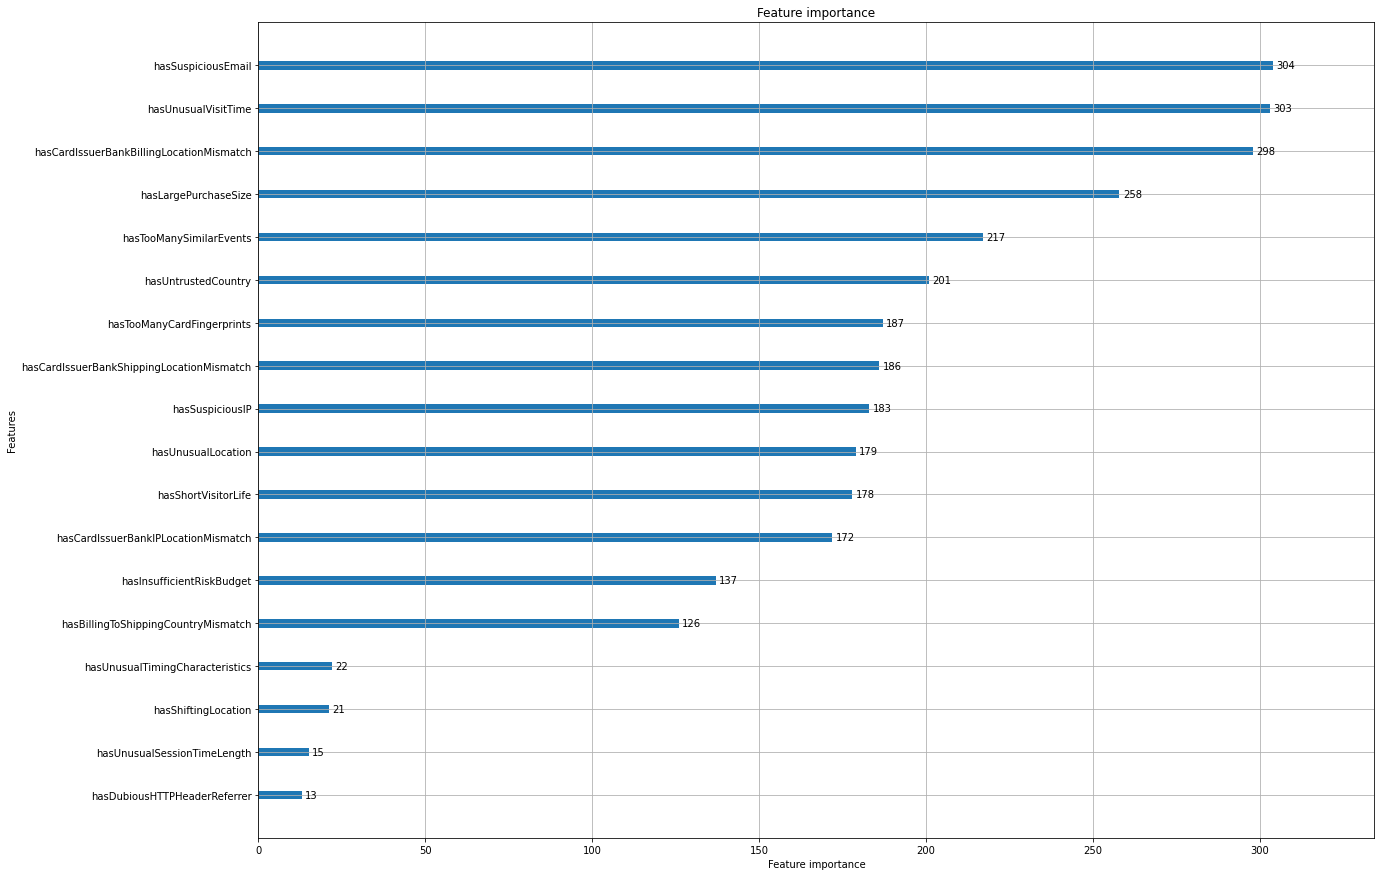

In [12]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 15]

lgb.plot_importance(clf)